# Stats - duration and severity, annual

In [1]:
import importlib
import matplotlib.pyplot as plt
import climag.climag as cplt
import seaborn as sns
import geopandas as gpd
import os
import numpy as np
import datetime

In [2]:
# mask for offshore areas
ie_bbox = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="ne_10m_land_2157_IE_BBOX_DIFF",
)
# mask for non-pasture areas
mask = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="CLC_2018_MASK_PASTURE_2157_IE",
)
# pasture areas for clipping prior to calculating stats
pastures = gpd.read_file(
    os.path.join("data", "landcover", "clc-2018-pasture.gpkg"),
    layer="dissolved",
)["geometry"]

In [13]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

## EURO-CORDEX

In [3]:
ds_ec = cplt.load_all_data("EURO-CORDEX")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(
<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [14]:
ds_ec_count, ds_ec_val = cplt.event_duration(ds_ec, variable="bm", skipna=True, rolling_time=30)

### Count

In [15]:
cplt.describe_dataset(ds_ec_count.sel(exp=["rcp45", "rcp85"]), pastures)

bm
count  8.680000e+03
mean  -3.612842e+18
std    4.502476e+18
min   -9.223372e+18
25%   -9.223372e+18
50%    3.700000e+01
75%    4.000000e+01
max    5.300000e+01

In [19]:
cplt.describe_dataset(ds_ec_count, pastures, model=True)

model         CNRM-CM5      EC-EARTH    HadGEM2-ES    MPI-ESM-LR
bm count  3.255000e+03  3.255000e+03  3.255000e+03  3.255000e+03
   mean  -3.612842e+18 -3.612842e+18 -3.612842e+18 -3.612842e+18
   std    4.502909e+18  4.502909e+18  4.502909e+18  4.502909e+18
   min   -9.223372e+18 -9.223372e+18 -9.223372e+18 -9.223372e+18
   25%   -9.223372e+18 -9.223372e+18 -9.223372e+18 -9.223372e+18
   50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   75%    3.900000e+01  3.800000e+01  3.900000e+01  3.900000e+01
   max    5.300000e+01  5.300000e+01  5.300000e+01  5.300000e+01

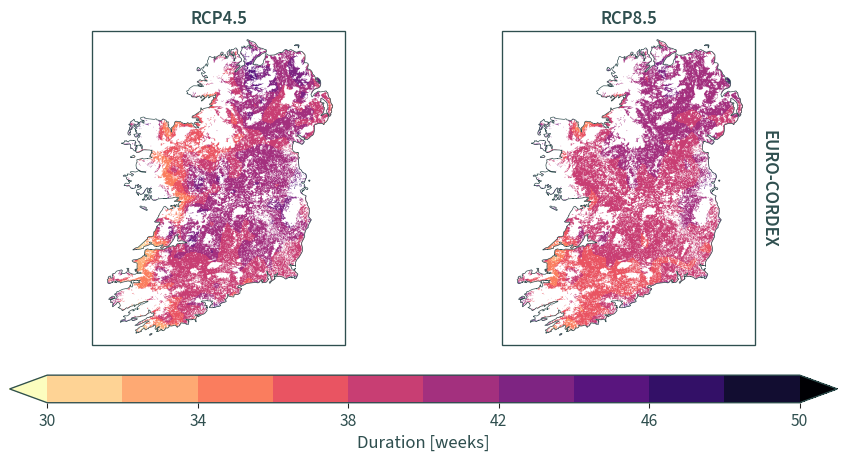

In [18]:
cplt.plot_stats(ds_ec_count.sel(exp=["rcp45", "rcp85"]).mean(dim="model", skipna=True).assign_coords(data="EURO-CORDEX").expand_dims(dim="data")["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Duration [weeks]", cmap="magma_r", extend="both", row="data",
    levels=np.arange(30, 50 + 2, 2)
)

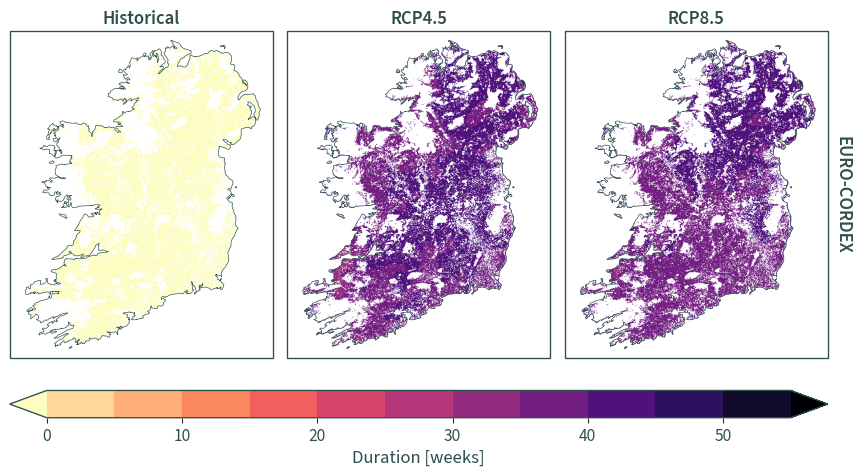

In [10]:
cplt.plot_stats(ds_ec_count.mean(dim="model", skipna=True).assign_coords(data="EURO-CORDEX").expand_dims(dim="data")["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Duration [weeks]", cmap="magma_r", extend="both", row="data",
    # levels=np.arange(190, 250 + 5, 5)
)

In [20]:
cplt.describe_dataset(ds_ec_count.sel(exp=["rcp45", "rcp85"]), pastures)

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/array/chunk.py:278: RuntimeWarning: invalid value encountered in cast
  return x.astype(astype_dtype, **kwargs)


bm
count  8.680000e+03
mean  -3.612842e+18
std    4.502476e+18
min   -9.223372e+18
25%   -9.223372e+18
50%    3.800000e+01
75%    4.100000e+01
max    5.300000e+01

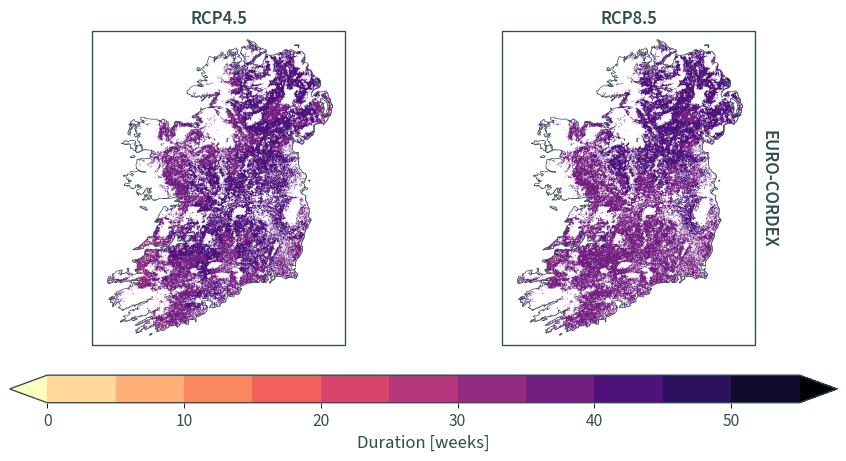

In [19]:
cplt.plot_stats(ds_ec_count.sel(exp=["rcp45", "rcp85"]).mean(dim="model", skipna=True).assign_coords(data="EURO-CORDEX").expand_dims(dim="data")["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Duration [weeks]", cmap="magma_r", extend="both", row="data",
    # levels=np.arange(190, 250 + 5, 5)
)

In [ ]:
cplt.plot_stats(ds_ec_count.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="EURO-CORDEX").expand_dims(dim="data")["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Duration [days]", cmap="magma_r", extend="both", row="data",
    levels=np.arange(190, 250 + 5, 5)
)

In [7]:
cplt.describe_dataset(ds_ec_count, pastures, season=True)

season              DJF            JJA            MAM            SON
bm count  237600.000000  237600.000000  237600.000000  237600.000000
   mean       47.421237      53.258552      68.082521      47.906734
   std        20.065139      20.988770      17.802567      24.107667
   min         0.000000       0.000000       0.000000       0.000000
   25%        35.000000      39.000000      61.000000      29.000000
   50%        51.000000      49.000000      70.000000      43.000000
   75%        61.000000      64.000000      80.000000      64.000000
   max        91.000000      92.000000      92.000000      91.000000

In [20]:
cplt.describe_dataset(ds_ec_count, pastures, exp=True)

exp         historical         rcp45         rcp85
bm count  2.604000e+05  2.604000e+05  2.604000e+05
   mean  -3.612842e+18 -3.612842e+18 -3.612842e+18
   std    4.502226e+18  4.502226e+18  4.502226e+18
   min   -9.223372e+18 -9.223372e+18 -9.223372e+18
   25%   -9.223372e+18 -9.223372e+18 -9.223372e+18
   50%    0.000000e+00  0.000000e+00  0.000000e+00
   75%    0.000000e+00  0.000000e+00  0.000000e+00
   max    0.000000e+00  0.000000e+00  0.000000e+00

In [9]:
ds_ec_count

<xarray.Dataset> Size: 28MB
Dimensions:       (model: 4, exp: 3, year: 60, rlat: 33, rlon: 37, season: 4)
Coordinates:
  * rlat          (rlat) float64 264B 3.685 3.795 3.905 ... 6.985 7.095 7.205
  * rlon          (rlon) float64 296B -17.27 -17.16 -17.05 ... -13.41 -13.3
  * exp           (exp) <U10 120B 'historical' 'rcp45' 'rcp85'
  * model         (model) <U10 160B 'CNRM-CM5' 'EC-EARTH' ... 'MPI-ESM-LR'
  * season        (season) <U3 48B 'DJF' 'MAM' 'JJA' 'SON'
  * year          (year) int64 480B 1976 1977 1978 1979 ... 2067 2068 2069 2070
    lat           (rlat, rlon) float64 10kB 51.14 51.18 51.22 ... 55.76 55.79
    lon           (rlat, rlon) float64 10kB -10.17 -10.0 ... -6.146 -5.962
    height        float64 8B 2.0
    rotated_pole  |S1 1B b''
    spatial_ref   int64 8B 0
Data variables:
    bm            (model, exp, year, rlat, rlon, season) float64 28MB dask.array<chunksize=(1, 2, 1, 33, 37, 1), meta=np.ndarray>

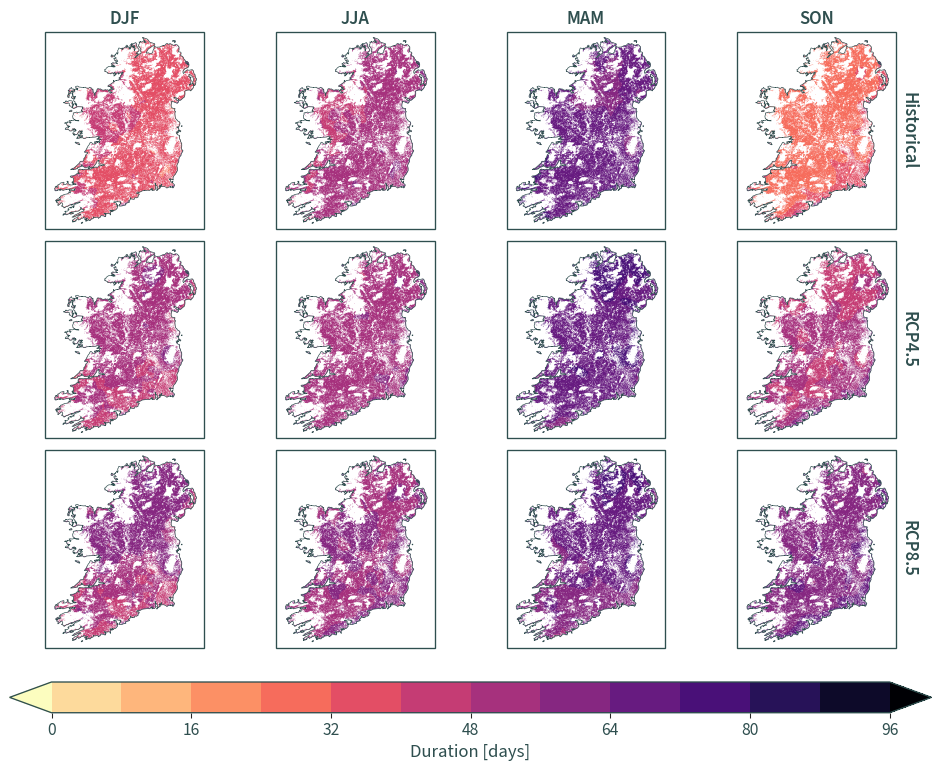

In [9]:
cplt.plot_stats(ds_ec_count.mean(dim="year", skipna=True).mean(dim="model", skipna=True)["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Duration [days]", cmap="magma_r", extend="both", row="exp", col="season",
    # levels=np.arange(190, 250 + 5, 5)
)

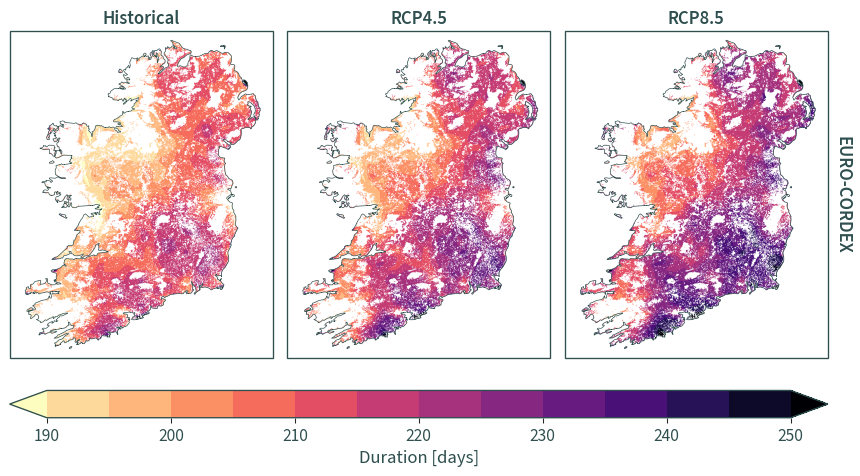

In [27]:
cplt.plot_stats(ds_ec_count.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="EURO-CORDEX").expand_dims(dim="data")["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Duration [days]", cmap="magma_r", extend="both", row="data",
    levels=np.arange(190, 250 + 5, 5)
)

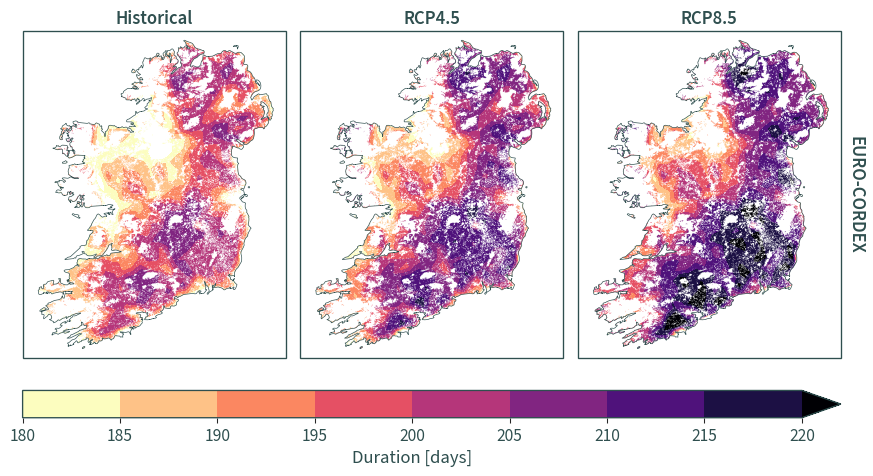

In [12]:
cplt.plot_stats(ds_ec_count.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="EURO-CORDEX").expand_dims(dim="data")["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Duration [days]", cmap="magma_r", extend="max", row="data",
    levels=np.arange(180, 220 + 5, 5)
)

### Magnitude

In [8]:
cplt.describe_dataset(ds_ec_val, pastures)

bm
count  237600.000000
mean      570.282532
std       221.757965
min         0.000000
25%       431.065750
50%       553.562775
75%       692.781845
max      1794.003906

In [9]:
cplt.describe_dataset(ds_ec_val, pastures, exp=True)

exp         historical         rcp45         rcp85
bm count  79200.000000  79200.000000  79200.000000
   mean     543.911743    578.466309    588.469788
   std      221.552170    218.720261    222.517242
   min        0.000000      0.000028      0.000030
   25%      404.279495    443.541458    449.793869
   50%      520.363647    565.210999    574.542755
   75%      661.621185    698.794434    713.539307
   max     1706.874634   1794.003906   1776.482056

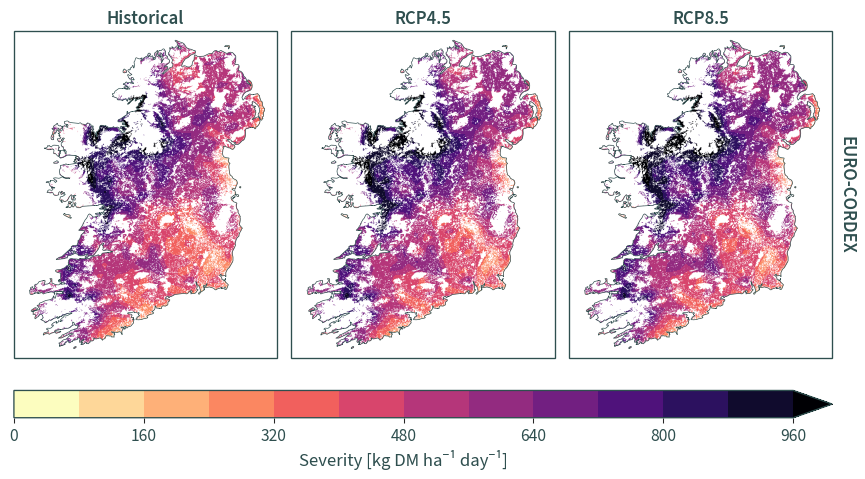

In [10]:
cplt.plot_stats(ds_ec_val.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="EURO-CORDEX").expand_dims(dim="data")["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Severity [kg DM ha⁻¹ day⁻¹]", cmap="magma_r", extend="max", row="data",
    # levels=np.arange(0, 800 + 80, 80)
)

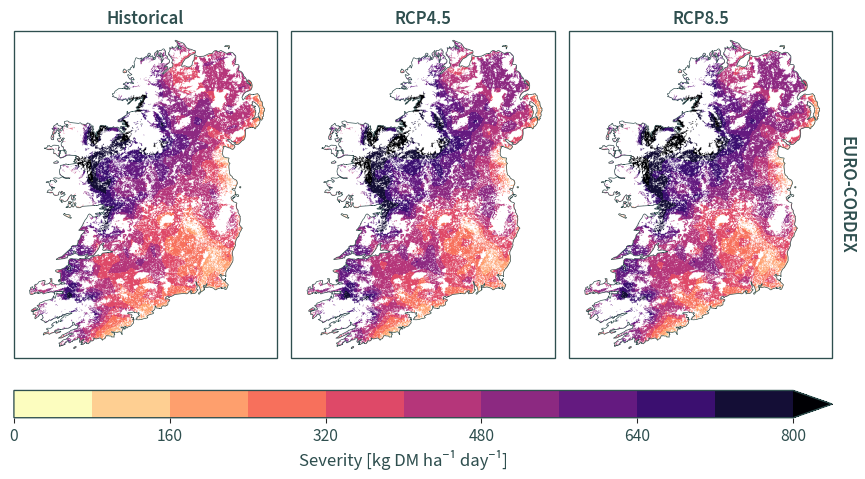

In [22]:
cplt.plot_stats(ds_ec_val.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="EURO-CORDEX").expand_dims(dim="data")["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Severity [kg DM ha⁻¹ day⁻¹]", cmap="magma_r", extend="max", row="data",
    levels=np.arange(0, 800 + 80, 80)
)

## HiResIreland

In [11]:
ds_hr = cplt.load_all_data("HiResIreland")

In [12]:
ds_hr_count, ds_hr_val = cplt.calc_event_duration(ds_hr, variable="bm", skipna=True)

### Count

In [13]:
cplt.describe_dataset(ds_hr_count, pastures)

bm
count  1.960920e+06
mean   2.282306e+02
std    4.086689e+01
min    0.000000e+00
25%    2.060000e+02
50%    2.220000e+02
75%    2.460000e+02
max    3.660000e+02

In [14]:
cplt.describe_dataset(ds_hr_count, pastures, exp=True)

exp          historical          rcp45          rcp85
bm count  653640.000000  653640.000000  653640.000000
   mean      217.111098     230.714952     236.865804
   std        39.107700      41.319271      39.613579
   min         0.000000       0.000000       0.000000
   25%       198.000000     208.000000     215.000000
   50%       212.000000     223.000000     233.000000
   75%       229.000000     248.000000     258.000000
   max       366.000000     366.000000     366.000000

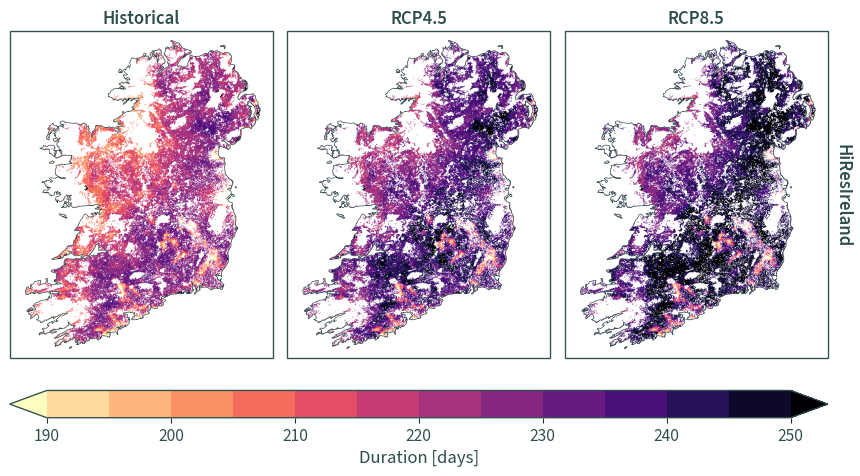

In [28]:
cplt.plot_stats(ds_hr_count.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="HiResIreland").expand_dims(dim="data")["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Duration [days]", cmap="magma_r", extend="both", row="data",
    levels=np.arange(190, 250 + 5, 5)
)

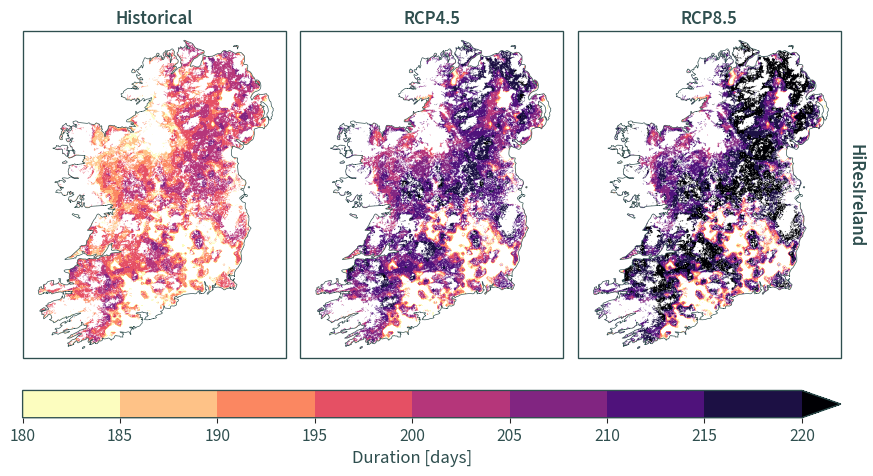

In [23]:
cplt.plot_stats(ds_hr_count.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="HiResIreland").expand_dims(dim="data")["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Duration [days]", cmap="magma_r", extend="max", row="data",
    levels=np.arange(180, 220 + 5, 5)
)

### Magnitude

In [16]:
cplt.describe_dataset(ds_hr_val, pastures)

bm
count  1.960920e+06
mean   3.698182e+02
std    1.651376e+02
min    0.000000e+00
25%    2.534459e+02
50%    3.562757e+02
75%    4.703903e+02
max    1.553591e+03

In [17]:
cplt.describe_dataset(ds_hr_val, pastures, exp=True)

exp          historical          rcp45          rcp85
bm count  653640.000000  653640.000000  653640.000000
   mean      334.965607     380.441559     394.048218
   std       150.487579     166.721848     171.621719
   min         0.000000       0.000000       0.000000
   25%       230.259121     263.064789     273.471802
   50%       322.551224     368.193710     382.428864
   75%       423.759865     483.408417     500.937614
   max      1364.728516    1479.500122    1553.590820

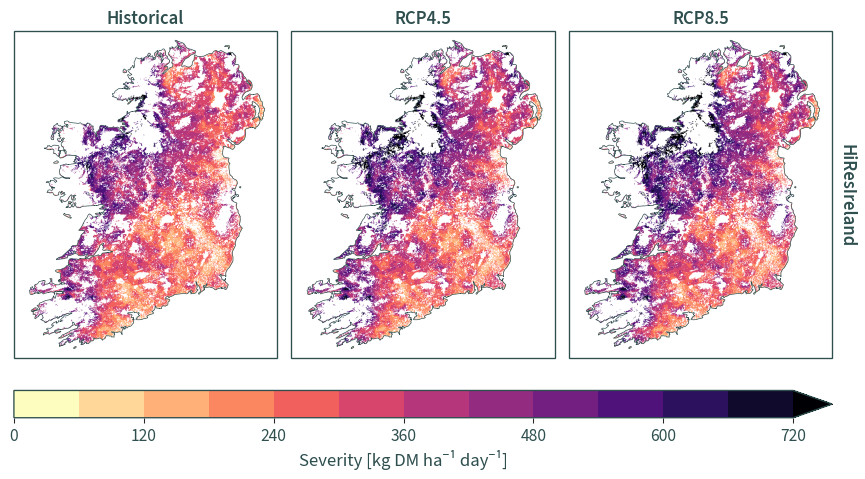

In [18]:
cplt.plot_stats(ds_hr_val.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="HiResIreland").expand_dims(dim="data")["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Severity [kg DM ha⁻¹ day⁻¹]", cmap="magma_r", extend="max", row="data",
    # levels=np.arange(0, 800 + 80, 80)
)

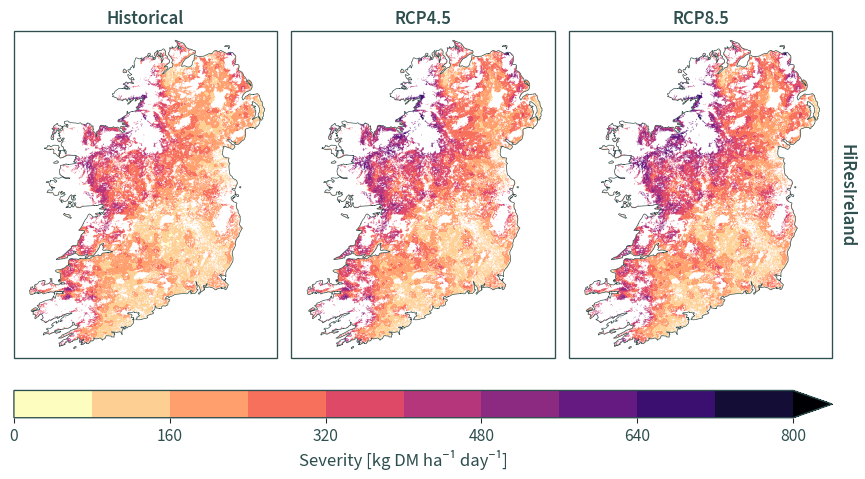

In [26]:
cplt.plot_stats(ds_hr_val.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="HiResIreland").expand_dims(dim="data")["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Severity [kg DM ha⁻¹ day⁻¹]", cmap="magma_r", extend="max", row="data",
    levels=np.arange(0, 800 + 80, 80)
)